# AAA Radiology Reports to detect prior surgery

**goal** is to detect if the patient had a prior surgery or not based on the report

### Exploring Dataset

In [1]:
# Important Libraries
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("radiology_report_gt.csv")

In [3]:
df

,Unnamed: 0,PERSON_ID,PROCEDURE_OCCURRENCE_ID_SCAN,Text,Prior Surgery
0,0,9002068524,18503399902601340269786000418023006,\r\nEXAMINATION: CTA aortic dissection - chest...,False
1,1,9000602491,18503205368901332197634000418023006,\r\nEXAMINATION: CTA aortic dissection - chest...,False
2,2,9001266422,18502701991801314199962000000074176,\r\nEXAMINATION: CTA aortic dissection - chest...,False
3,3,9002493192,18500888618801230074882000418023006,\r\nEXAMINATION: CTA aortic dissection - chest...,True
4,4,9000494908,18503739894601352801784000418023006,\r\nEXAMINATION: CTA aortic dissection - chest...,True
...,...,...,...,...,...
1509,1513,9002643449,18502428946201304412501000764729002,\r\nEXAMINATION: CT ABDOMEN AND PELVIS - ROUTI...,False
1510,1514,9001275930,18503731669501352589569000000074150,\r\nEXAMINATION: CT CHEST ABDOMEN AND PELVIS -...,False
1511,1515,9000976513,18502989370401325367818000764729002,\r\nEXAMINATION: CT ABDOMEN AND PELVIS - ROUTI...,False
1512,1516,9005724698,18500918286401247990579000764729002,\r\nEXAMINATION: CT ABDOMEN AND PELVIS - ROUTI...,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    1514 non-null   int64 
 1   PERSON_ID                     1514 non-null   object
 2   PROCEDURE_OCCURRENCE_ID_SCAN  1514 non-null   object
 3   Text                          1514 non-null   object
 4   Prior Surgery                 1514 non-null   bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 48.9+ KB


In [5]:
False_values ,True_values =df['Prior Surgery'].value_counts()
print(f"There is {False_values} False Value, and {True_values} True Value")

There is 1442 False Value, and 72 True Value


In [6]:
df.Text[0]

'\r\nEXAMINATION: CTA aortic dissection - chest, abdomen, and pelvis including iliac arteries\r\n\r\nIMPRESSION:  \r\n\r\nNew moderate left and small right simple pleural effusions with associated bibasilar atelectasis. Otherwise, no significant change in the Stanford type B aortic intramural hematoma compared to October 14, 2022.  \r\n\r\nCLINICAL INDICATION: 65 yo with AAA :: AAA (abdominal aortic aneurysm)\r\n\r\nTECHNIQUE: \r\nCT scanning of the chest was performed without administration of intravenous contrast. Following this, CTA of the chest, abdomen and pelvis was performed following intravenous administration of contrast. Reformats were constructed in the sagittal and coronal planes. MIP images were performed and sent to PACS for archiving.  \r\nIntravenous contrast: IOPAMIDOL 76 % INTRAVENOUS SOLUTION: 100 mL \r\n\r\nCOMPARISON: CT aortic dissection dated October 14, 2022.\r\n\r\nINTERPRETATION: \r\n\r\nSCOUT: No additional findings.\r\n \r\nAIRWAYS, LUNGS AND PLEURA: The cen

### Data Augmentation

as we saw later there is a bias in the labels because there is only 72 True value and 1442 False value so if we take a random sample of False values to reduce the bias and start augmentation it may works well.

In [7]:
False_samples = df[df['Prior Surgery'] == False]
True_samples = df[df['Prior Surgery'] == True]

In [8]:
# take 100 random sample from false values
False_samples = False_samples.sample(100)

In [9]:
df_new = pd.concat([True_samples, False_samples])

In [10]:
df_new['Prior Surgery'].value_counts()

Prior Surgery
False    100
True      72
Name: count, dtype: int64

In [11]:
!pip install nlpaug

In [12]:
import nlpaug.augmenter.word as naw

aug = naw.SynonymAug(aug_src='wordnet')

In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 3 to 846
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    172 non-null    int64 
 1   PERSON_ID                     172 non-null    object
 2   PROCEDURE_OCCURRENCE_ID_SCAN  172 non-null    object
 3   Text                          172 non-null    object
 4   Prior Surgery                 172 non-null    bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 6.9+ KB


In [14]:
df_new.drop(['Unnamed: 0', 'PERSON_ID', 'PROCEDURE_OCCURRENCE_ID_SCAN'], axis=1, inplace=True)

In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 3 to 846
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Text           172 non-null    object
 1   Prior Surgery  172 non-null    bool  
dtypes: bool(1), object(1)
memory usage: 2.9+ KB


In [16]:
# Text data augmentation
print(f'df_new length is {df_new.count()}')

# 1st aug
df_aug = aug.augment(list(df_new['Text']))
df_aug = pd.DataFrame({'Text':df_aug, 'Prior Surgery':df_new['Prior Surgery']})
df_new = pd.concat([df_new,df_aug])
print(f'First augmentation --> df_new length is {df_new.count()}')

# 2nd aug
df_aug = aug.augment(list(df_new['Text']))
df_aug = pd.DataFrame({'Text':df_aug, 'Prior Surgery':df_new['Prior Surgery']})
df_new = pd.concat([df_new,df_aug])
print(f'Second augmentation --> df_new length is {df_new.count()}')

# 3th aug
df_aug = aug.augment(list(df_new['Text']))
df_aug = pd.DataFrame({'Text':df_aug, 'Prior Surgery':df_new['Prior Surgery']})
df_new = pd.concat([df_new,df_aug])
print(f'Third augmentation --> df_new length is {df_new.count()}')

# 4th aug
df_aug = aug.augment(list(df_new['Text']))
df_aug = pd.DataFrame({'Text':df_aug, 'Prior Surgery':df_new['Prior Surgery']})
df_new = pd.concat([df_new,df_aug])
print(f'Fourth augmentation --> df_new length is {df_new.count()}')

# 5th aug
df_aug = aug.augment(list(df_new['Text']))
df_aug = pd.DataFrame({'Text':df_aug, 'Prior Surgery':df_new['Prior Surgery']})
df_new = pd.concat([df_new,df_aug])
print(f'Fifth augmentation --> df_new length is {df_new.count()}')

df_new length is Text             172
Prior Surgery    172
dtype: int64
First augmentation --> df_new length is Text             344
Prior Surgery    344
dtype: int64
Second augmentation --> df_new length is Text             688
Prior Surgery    688
dtype: int64
Third augmentation --> df_new length is Text             1376
Prior Surgery    1376
dtype: int64
Fourth augmentation --> df_new length is Text             2752
Prior Surgery    2752
dtype: int64
Fifth augmentation --> df_new length is Text             5504
Prior Surgery    5504
dtype: int64


### Text Cleaning

In [24]:
import re
import string
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

nltk.download('stopwords')
stemmer = SnowballStemmer("english")

# Remove Stopwords
def remove_english_stopwords(text):
    stop_words = stopwords.words('english')
    words = text.split()
    filtered_sentence = ''
    for word in words:
        if word not in stop_words:
            filtered_sentence = filtered_sentence + word + ' '
    return filtered_sentence


# Remove Punvtuation
def remove_punctuation(text):
    table = str.maketrans('','',string.punctuation)
    words = text.split()
    filtered_sentence = ''
    for word in words:
        word = word.translate(table)
        filtered_sentence = filtered_sentence + word + ' '
    return filtered_sentence

# Normalize Text
def normalize_english_text(text):
    TEXT_CLEANING_RE = "[0-9]+"
    text = re.sub('_x000D_', '', text)
    text = text.lower()
    # get rid of urls
    text = re.sub(TEXT_CLEANING_RE, '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # get rid of non words and extra spaces
    text = re.sub('\\W', ' ', text)
    text = re.sub('\n', '', text)
    text = re.sub(' +', ' ', text)
    text = re.sub('^ ', '', text)
    text = re.sub(' $', '', text)
    return text

def stem(text, stem=False):
    tokens = []
    for token in text.split():
        if stem:
            tokens.append(stemmer.stem(token))
        else:
            tokens.append(token)
    return " ".join(tokens)

def clean_text(text):
    text = text.replace(',',' , ')
    text = text.replace('.',' . ')
    text = text.replace('/',' / ')
    text = text.replace('@',' @ ')
    text = text.replace('#',' # ')
    text = text.replace('?',' ? ')
    text = normalize_english_text(text)
    text = remove_punctuation(text)
    text = remove_english_stopwords(text)
    text = stem(text)

    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/abdelrahman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
clean_text(df_new.Text.iloc[0])

'examination cta aortic dissection chest abdomen pelvis including iliac arteries impression examination limited lack noncontrast ct scan abdomen pelvis status post distal aorta biiliac endovascular stenting abdominal aorta aneurysm measuring cm significantly increased size prior exam several areas increased attenuation within aneurysm sac detailed suggestive presence endoleak possibly type though evaluation limited due lack noncontrast images abdomen pelvis sma ostial noncalcified plaque thrombus causing moderate stenosis thick walled gallbladder likely contracted small hypodense areas within proximal pancreatic body tail evaluated elective mri abdomen clinical indication abd pain aaa us aaa abdominal aortic aneurysm technique ct scanning chest performed without administration intravenous contrast following cta chest abdomen pelvis performed following intravenous administration contrast reformats constructed sagittal coronal planes mip images performed sent pacs archiving intravenous c

In [26]:
df_new['clean_text'] = df_new.Text.apply(clean_text)

### Generating a word cloud to highlight important keywords

In [22]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/22/0d/bb4eccd60d272b33cbc79c661c60acc604f1688cfc922deb9d3eb5be640a/wordcloud-1.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 890.3 kB/s eta 0:00:00 eta 0:00:0100:0101m


In [30]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
comment_words = ''

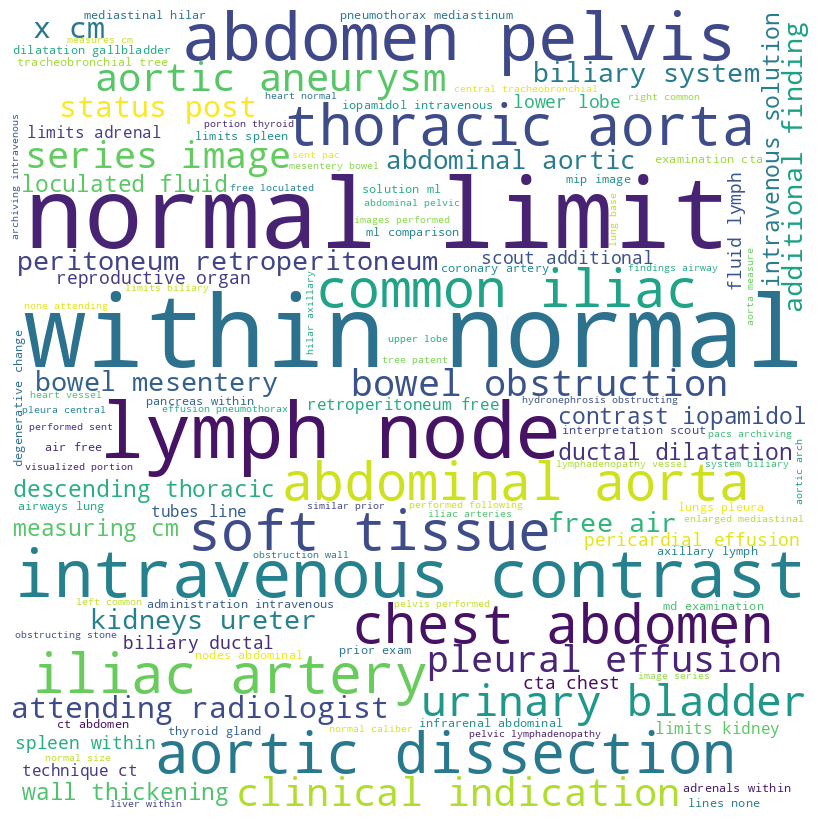

In [41]:
# Check For False Values only

# iterate through the csv file
for val in df_new['clean_text'][df_new['Prior Surgery']==False]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('WordCloudFalseValues.png')
plt.show()

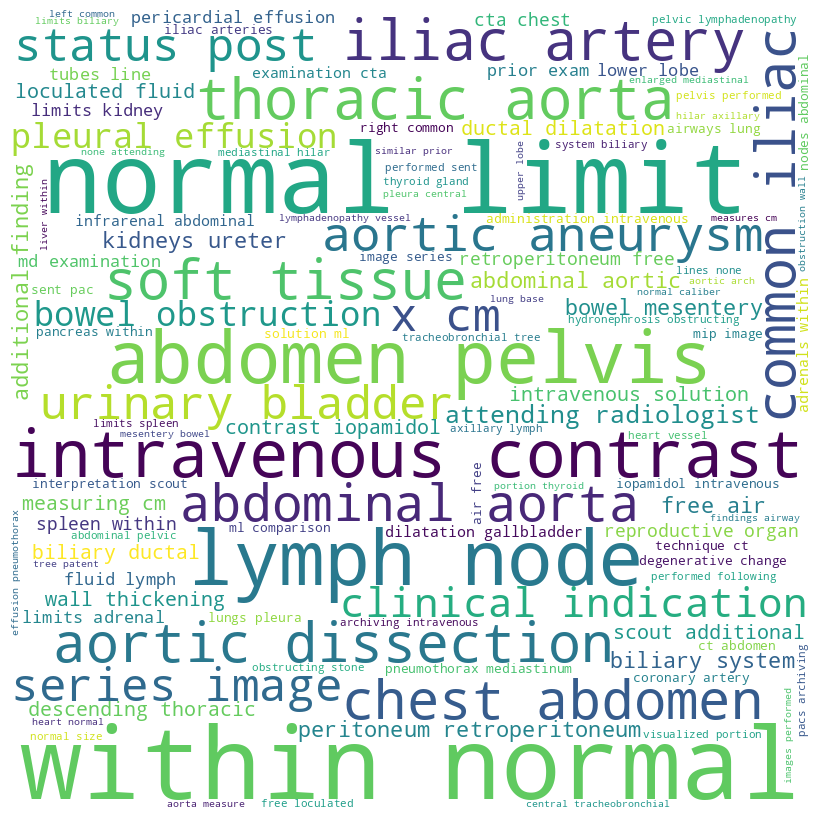

In [42]:
# Check For True Values only

# iterate through the csv file
for val in df_new['clean_text'][df_new['Prior Surgery']==True]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('WordCloudTrueValues.png')
plt.show()

### Data Preprocessing

In [56]:
# important libraries for deep learning
import tensorflow as tf 
from tensorflow import keras
# for tokenizing texts
from tensorflow.keras.preprocessing.text import Tokenizer
# for text padding and truncating
from tensorflow.keras.utils import pad_sequences
# to split datasets
from sklearn.model_selection import train_test_split

# one hot encoding
from sklearn.preprocessing import LabelEncoder

# to build word cloud
import gensim

In [57]:
# WORD2VEC 
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

w2v_model = gensim.models.word2vec.Word2Vec(vector_size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)

documents = [_text.split() for _text in df_new['clean_text']]

In [58]:
w2v_model.build_vocab(documents)

In [59]:
words = w2v_model.wv.key_to_index
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 3881


In [60]:
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

(49341511, 59235744)

In [61]:
w2v_model.wv.most_similar("intravenous")

[('endovenous', 0.8074749708175659),
 ('administration', 0.5152232050895691),
 ('performed', 0.4642249345779419),
 ('thorax', 0.46319955587387085),
 ('examination', 0.3846852481365204),
 ('chest', 0.3834865093231201),
 ('reccomended', 0.380941241979599),
 ('scan', 0.3776194751262665),
 ('angiogram', 0.3771422803401947),
 ('removal', 0.3763153851032257)]

In [62]:
# important properties
vocab_size = 6000
max_length = 300
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [63]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(df_new['clean_text'])

In [64]:
# get unique word count
len(tokenizer.word_index)

5677

In [65]:
#To Save conf execute this cell
#Save Tokenizer Configuration
import json 
import os 

tok_conf = tokenizer.to_json()
try:
    os.mkdir('tokenizer/')
except:
    print('Folder already there!')

with open('tokenizer/tok_conf.json', 'w') as outfile:
    outfile.write(json.dumps(tok_conf))

In [67]:
X = tokenizer.texts_to_sequences(df_new['clean_text'])

X = pad_sequences(X, maxlen=max_length,
                         padding=padding_type,
                         truncating=trunc_type)

In [68]:
df_new["Prior Surgery"].value_counts()

Prior Surgery
False    3200
True     2304
Name: count, dtype: int64

In [69]:
# let's encode the labels with Label encoder to set 0: False and 1: True
y = df_new["Prior Surgery"]
LE = LabelEncoder()
y = LE.fit_transform(y)

In [70]:
X

array([[ 82,  34,   7, ...,  38,   6, 365],
       [ 82,  34,   7, ...,   3,  11,  64],
       [ 82,  34,  21, ...,  30, 150,  12],
       ...,
       [ 82,  14,  16, ...,   0,   0,   0],
       [ 82,  34,   7, ...,   0,   0,   0],
       [ 82,  34,   7, ...,   0,   0,   0]], dtype=int32)

In [71]:
y

array([1, 1, 1, ..., 0, 0, 0])

### Train/Test Split

In [72]:
# Split the dataset for training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.1, 
                                                    random_state=42,
                                                    shuffle=True)

In [74]:
print("sample of X_train: ",X_train[0])
print("label for sample: ",y_train[0])

sample of X_train:  [  82   34   21   16   22   87    7   26   18   58  840  503   37  307
   83   51   47   57  140  370  295  706 1503   20  167  773   51 1011
   62  259  516 1913  728   19   63   47   57    3  160   81   98  570
 1852   21  132  286   26  570    9  132   85   34   21   16   22   23
  109   75   13   10  158   66   23  164  148  166  416  757  337  126
  434  430  112   13  139  112   84 1379  475   16   22  165  106  118
   90  625  155   93   86 2249  175  168   39  417 2076  151  122  198
   80   42  136  134   62  143  163  169   25   31  102  141  149  117
  123   32   36   32    3   67  116  193  453  254   71   29   12    3
  157    7   26  129   42   53    2    3  450   33   99   33  119   49
   52  199  182   72    2    3   11   92    2    3   11  114    2    3
   11   70  115   91  152  156   19  108   19   63   47   57    3  160
   83  727   37  307   83   51   47   57  140  370  295  706 1503   20
  167  773   51 1011  138  702   62  259  516 1913  728  

### Model Architecture

In [75]:
# for nn arch 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [76]:
# build embedding layer for word vectors
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(6000, 300)


In [86]:
def build_model():
    model = Sequential()

    model.add(Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=max_length, trainable=False))
   
    model.add(LSTM(100,return_sequences=True))
    model.add(Dense(100, activation='relu'))

    model.add(LSTM(32,dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(32, activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=2, cooldown=0),
                  EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=2)]
    return model, callbacks

In [87]:
model, callbacks = build_model()

In [88]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 300)          1800000   
                                                                 
 lstm_2 (LSTM)               (None, 300, 100)          160400    
                                                                 
 dense_3 (Dense)             (None, 300, 100)          10100     
                                                                 
 lstm_3 (LSTM)               (None, 32)                17024     
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1988613 (7.59 MB)
Trainable params: 1886

### Train Model

In [89]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=.1, callbacks=[callbacks])

Epoch 1/5
140/140 [==============================] - 51s 340ms/step - loss: 0.3044 - accuracy: 0.8858 - val_loss: 0.1777 - val_accuracy: 0.9335 - lr: 0.0010
Epoch 2/5
140/140 [==============================] - 46s 331ms/step - loss: 0.1282 - accuracy: 0.9596 - val_loss: 0.2745 - val_accuracy: 0.9335 - lr: 0.0010
Epoch 3/5
140/140 [==============================] - 47s 333ms/step - loss: 0.1003 - accuracy: 0.9702 - val_loss: 0.0763 - val_accuracy: 0.9839 - lr: 0.0010
Epoch 4/5
140/140 [==============================] - 47s 337ms/step - loss: 0.0996 - accuracy: 0.9726 - val_loss: 0.3832 - val_accuracy: 0.9274 - lr: 0.0010
Epoch 5/5
140/140 [==============================] - 52s 373ms/step - loss: 0.1276 - accuracy: 0.9652 - val_loss: 0.0951 - val_accuracy: 0.9758 - lr: 0.0010


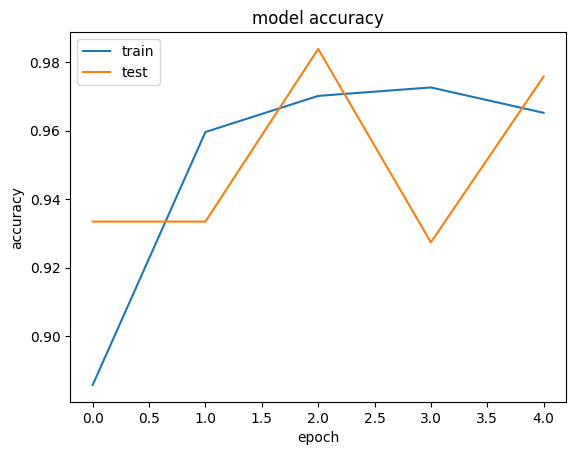

In [90]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

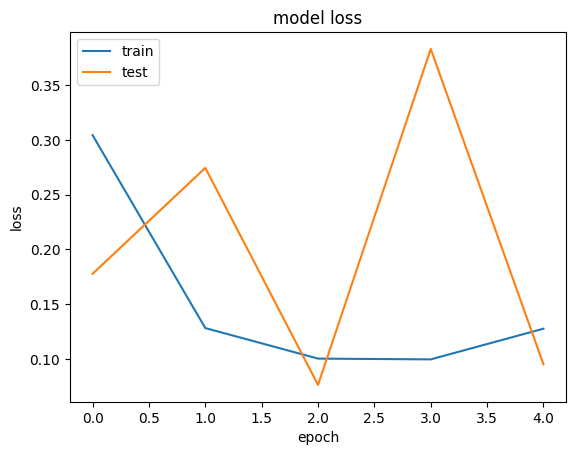

In [91]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluate The Model

In [99]:
ev = model.evaluate(X_test,y_test)

print(f"Loss: {round(ev[0], 2)}, Accuracy: {round(ev[1], 2)}")

18/18 [==============================] - 2s 110ms/step - loss: 0.0988 - accuracy: 0.9746
Loss: 0.1, Accuracy: 0.97


In [97]:
predictions = model.predict(X_test[:20])
print("predictions: ", np.round(predictions))
print("True Values: ", y_test[:20])

1/1 [==============================] - 0s 108ms/step
predictions:  [[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]
True Values:  [1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1]


### Save and load the model

In [98]:
model.save('models/PriorSurgeryDetector_v1.h5')

In [27]:
from tensorflow.keras.models import load_model

model = load_model('models/PriorSurgeryDetector_v1.h5')

2023-08-26 20:07:59.200919: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-26 20:08:06.630238: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-08-26 20:08:13.263924: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-26 20:08:13.494774: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GP

In [46]:
# for tokenizing texts
from tensorflow.keras.preprocessing.text import tokenizer_from_json
# for text padding and truncating
from tensorflow.keras.utils import pad_sequences

import json

In [41]:
pwd

'/home/abdelrahman/Desktop/Dr. Tim/new'

In [42]:
ls

AAA_Radiology_Report_Prior_Surgery_Detector.pdf  radiology_report_gt.csv
main.ipynb                                       Screenshots/
models/                                          tokenizer/


In [47]:
# important properties
vocab_size = 6000
max_length = 300
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

with open('tokenizer/tok_conf.json') as json_file:
        tok = tokenizer_from_json(json.load(json_file))
    
X = tok.texts_to_sequences(df_new.clean_text)

X = pad_sequences(X, maxlen=max_length,
                         padding=padding_type,
                         truncating=trunc_type)

In [48]:
prediction = model.predict(X)

172/172 [==============================] - 20s 103ms/step


In [53]:
labels = []
for i in df_new['Prior Surgery']:
    if i == True:
        labels.append(1)
    else: 
        labels.append(0)

In [54]:
prediction = prediction.round()

In [57]:
prediction

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [60]:
import tensorflow as tf

conf_matrix = tf.math.confusion_matrix(
    np.asarray(labels),
    prediction,
    num_classes=2
)

In [61]:
TP, FP = conf_matrix[0]
FN, TN = conf_matrix[1]

In [69]:
presicion = TP / (TP + FP)

recall = TP / (TP + FN)

F1_Score = 2 * (presicion * recall) / (presicion + recall) 

In [78]:
print(f'True Positive: {TP}, False Positive {FP}\nFalse Negative: {FN}, True Negative: {TN}')
print('\n----------------\n')
print(f'Presicion: {(round(float(presicion), 4)*100)}%')
print(f'Recall: {round(float(recall), 3)*100}%')
print(f'F1_Score: {round(float(F1_Score), 4)*100}%')

True Positive: 2499, False Positive 701
False Negative: 128, True Negative: 2176

----------------

Presicion: 78.09%
Recall: 95.1%
F1_Score: 85.77%
